## 결측치(missing value)
- 누락된 값, 비어있는 값
- 결측치 발생한 이유를 알아야 함 : 휴먼에러, 진짜 결측
- 결측치 처리 방법 
- 1. NA 날리기 : 어떤 기준으로 날릴 것인지 기준이 필요
- 2. NA값 채우기 : 어떻게 채울 것인가
- 결측치 확인 함수 : isna()

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                   '성적':[100,80,np.nan],
                   '등급':['A',np.nan,'B']})

In [3]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수;,NaN,B


*참고
- s1.isnull.all() : 데이터가 모두 null인지 검사
- s1.isnull.any() : null이 하나라도 있는지 검사

In [6]:
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

###  결측치 제거 방법
- df.dropna() : 결측치가 있는 행을 제거하는 함수. 
- df.dropna(subset = ['원하는 변수 명']

In [7]:
df.dropna(subset = ['성적']) #원본을 바꾸려면 inplace  필수 사용!

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN


*원본을 바구려면 inplace 필수 사용
-> df.dropna(subset = ['성적'], inplace = True)

*참고
- s1.dropna(how = ‘all’) #행 전체가 na인 행만 삭제
- s1.dropna(thresh = 2) na가 아닌 값이 n개인 행 출력

In [8]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [9]:
df.dropna() #전체 모든 na 값 제거

,이름,성적,등급
0,홍길동,100.0,A


In [10]:
df.성적.sum() # na값 제외하고 합쳐짐

180.0

In [11]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [12]:
df['성적']+100

0    200.0
1    180.0
2      NaN
Name: 성적, dtype: float64

In [13]:
df.성적.mean() #(100+80)/2 => na 값 반영 X

90.0

-> 숫자열 데이터 타입에서 NaN 값은 계산이 안되므로 제외하고 계산함.

In [16]:
df.이름.value_counts().sum()

3

In [18]:
df.등급.value_counts().sum() #nan값 제외됨

2

-> 문자열 데이터, 범주형 데이터도 NaN값 계산 X

In [19]:
df.shape #전체 df의 행과 열은 포함되어 나오나, 컬럼을 기준으로 들어가서 값을 계산하려 하면 NA값은 제외함.

(3, 3)

In [48]:
exam = pd.read_csv('/content/exam.csv')

In [49]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [50]:
exam.loc[[3,8,9,15],['english']] = np.nan

### np.nan : numpy에서 제공하는 함수 nan값을 na로 바꿀 때 사용

In [51]:
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,NaN,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,NaN,15
9,10,3,50,NaN,45


In [52]:
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [53]:
exam.english.mean() # na값 반영 안한 mean

81.625

## na값을 대체하는 방법 : fillna()
- fillna()를 사용하면 대체하는 값을 넣을 수 있음


*참고
- s1.fillna({‘a’:’a’, ‘b’:’b’, ‘c’:’c’}) #Na를 각 컬럼별 치환
- s1.fillna(method = ‘ffill’) #이전 행 데이터로 치환
- s1.fillna(method = ‘bfill’) #이후 행 데이터로 치환

In [46]:
exam['english'] = exam['english'].fillna(0)

In [47]:
exam.english.mean()

65.3

- 결측치들을 0으로 대체한 결과 기존 평균 81.625 >> 65.3 으로 차이가 커짐
- 결측치 대처 시 도메인 지식과 적절한 판단이 필요
ex. exam 영어가 결측치더라도 0점은 아닐 것이라고 판단할 필요가 있음
-> 이 결측치를 최대한 어떻게 대처해서 머신러닝에게 학습 시키느냐에 따라 머신러닝의 평가지표가 달라질 수 있다. 

In [55]:
exam['english'] = exam['english'].fillna(81.6) # 평균값으로 결측치를 채움

In [56]:
exam.english.mean() #차이가 크지 않은 평균값이 도출됨.

81.62

### 이상치(anomaly)
- 정상적인 이상치일 수 있고, 논리적으로 잘못된 이상치일 수 있으므로 도메인 지식을 가지고 분석가가 잘 판단해야 함
ex. 고객 장바구니 데이터를 보는 데 주문 금액이 마이너스인 경우, 반품했기 때문에 마이너스일 수 있다.
- 이상치의 판단 기준 : IQR, 분석가가 직접 특정한 값(주관적 판단 필요)

In [79]:
mpg = pd.read_csv('/content/mpg.csv')

In [58]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [80]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

###IQR boxplot 확인하기

In [81]:
import seaborn as sns

<Axes: ylabel='cty'>

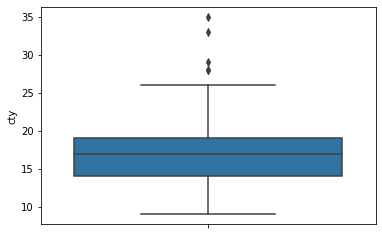

In [82]:
sns.boxplot(data = mpg, y = 'cty')

- 상자 아래 세로 선 : 극단치 경계, 이상치 판단 기준
- 아랫수염 : 0~25% 내에 해당하는 값
- 상자 밑면 1사분위수(Q1) : 하위 25% 값
- 상자 안의 선 2사분위수(Q2) : 중앙값(50%)
- 상자 윗면 3사분위 수(Q3) : 하위 75% 값
- 윗 수염 : 75~100% 위치하는 값


---
- 상자 밖의 점들이 극단치(Q1, Q3 밖 1.5IQR 넘어간 값)
- IQR 극단치 기준값 구하기 위해서는 분위수를 만들어야 함 => quantile() 사용


In [83]:
p25 = mpg['cty'].quantile(0.25)

In [63]:
p25 # 1분위수는 14.0

14.0

In [84]:
p75 = mpg['cty'].quantile(0.75)

In [65]:
p75 # 3분위수는 19.0

19.0

In [85]:
iqr = p75 - p25

In [67]:
iqr

5.0

- 아래 하한선 : p25 - 1.5*iqr
- 위의 하한선 : p75 + 1.5*iqr

In [86]:
p25 - 1.5*iqr # 아래 하한선

6.5

In [87]:
p75 + 1.5*iqr # 위에 하한선

26.5

In [88]:
mpg['cty'] = np.where((mpg['cty']<6.5) | (mpg['cty']>26.5), np.nan, mpg['cty'])

In [89]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [90]:
mpg_1 = mpg.dropna()

In [91]:
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<Axes: ylabel='cty'>

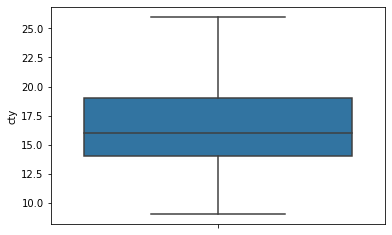

In [92]:
sns.boxplot(data = mpg_1, y='cty')

In [99]:
mpg['cty'].mean() #이상치 제거 전

16.558951965065503

In [103]:
mpg_1['cty'].mean() #이상치 제거 후

16.558951965065503

- 전처리를 과정 중 작은 차이들이 실제 모델링에서는 큰 영향을 줄 수 있음
- 스케일링을 하는 것도 데이터에 대한 편차를 최소화해서 모델에게 학습시키기 위함임

### loc iloc
- 인덱스 기준으로 추출하는 것
- loc : 인덱스 기준으로 행 데이터 추출
- iloc : 행 번호 기준으로 행 데이터 추출

In [104]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21.0,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19.0,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21.0,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16.0,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18.0,26,p,midsize


In [105]:
mpg.loc[0] # 인덱스 기준 값 추출

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [106]:
mpg.loc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact


In [107]:
mpg.iloc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact


In [108]:
mpg_sp = mpg.loc[[0,2,4,6,8]]

In [109]:
mpg_sp

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18.0,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16.0,25,p,compact


In [110]:
mpg_sp.loc[4]

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                 16.0
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

loc은 인덱스의 번호 기준으로 가져온다.
- 인덱스가 '4'인 데이터를 가져옴

In [111]:
mpg_sp.iloc[4]

manufacturer          audi
model           a4 quattro
displ                  1.8
year                  1999
cyl                      4
trans             auto(l5)
drv                      4
cty                   16.0
hwy                     25
fl                       p
category           compact
Name: 8, dtype: object

iloc은 현재 데이터프레임(새로 만들어진 df)에 순서를 기반으로 출력된다.

In [114]:
mpg_sp.loc[6]

manufacturer        audi
model                 a4
displ                3.1
year                2008
cyl                    6
trans           auto(av)
drv                    f
cty                 18.0
hwy                   27
fl                     p
category         compact
Name: 6, dtype: object

In [115]:
mpg_sp.iloc[6] #행 번호를 넘어가서 에러

IndexError: ignored

In [116]:
for i in range(10):
  print(mpg.loc[i])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object
manufacturer          audi
model                   a4
displ                  1.8
year                  1999
cyl                      4
trans           manual(m5)
drv                      f
cty                   21.0
hwy                     29
fl                       p
category           compact
Name: 1, dtype: object
manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                   20.0
hwy                     31
fl                       p
category           compact
Name: 2, dtype: object
manufacturer        audi
model                 a4
displ       